# Setting up the environment

In [1]:
import pandas as pd
import numpy as np
import random as rn
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import statistics as st

import warnings
warnings.filterwarnings('ignore')


# Importing Data


In [2]:
Tr=pd.read_csv("DUMD_train.csv")
Te=pd.read_csv("DUMD_test.csv")

TrX=Tr.drop(columns=['UNS'])
Try=Tr['UNS']
TeX=Te.drop(columns=['UNS'])

Tey=Te['UNS']
Tr

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,3
2,0.10,0.10,0.15,0.65,0.30,2
3,0.08,0.08,0.08,0.98,0.24,1
4,0.09,0.15,0.40,0.10,0.66,2
...,...,...,...,...,...,...
318,0.90,0.78,0.62,0.32,0.89,3
319,0.85,0.82,0.66,0.83,0.83,3
320,0.56,0.60,0.77,0.13,0.32,1
321,0.66,0.68,0.81,0.57,0.57,2


# Training with different activation function 

Mean accuracy is : 0.90625


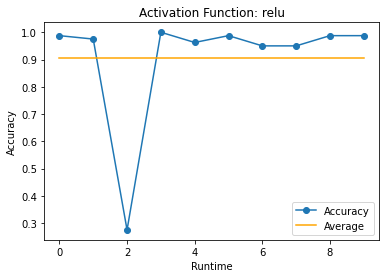

Mean accuracy is : 0.98125


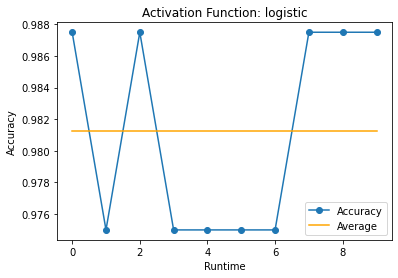

Mean accuracy is : 0.98


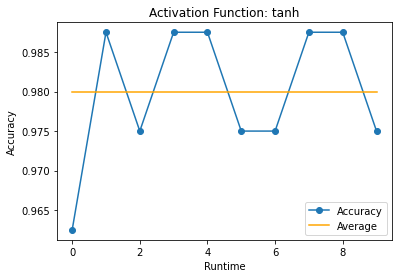

In [3]:
lr=0.1

base=0
for act in ['relu','logistic','tanh']:
    scores=[]
    for i in range(10):
        clf = MLPClassifier(random_state=i,hidden_layer_sizes=(4), max_iter=1000,
                            learning_rate_init=lr,activation=act).fit(TrX, Try)
        clf.predict_proba(TeX)
        clf.predict(TeX)
        sc=clf.score(TeX, Tey)
        scores.append(sc)
    smean=st.mean(scores)
    base=max(base,smean)
    print("Mean accuracy is :",smean)
#     print(clf.n_layers_)
    plt.plot(scores,marker='o',label='Accuracy')
    x = []
    y=[]
    
    for j in range(10):
        x.append(j)
        y.append(smean)
    plt.plot(x,y,color='orange',label='Average')
    
    plt.xlabel('Runtime')
    plt.ylabel('Accuracy')
    plt.title('Activation Function: '+act)
    plt.legend()
    plt.show()
    


Our best model is logistic sigmoid

# Traning the best model with different number of hidden layers

Mean accuracy is: 0.98125


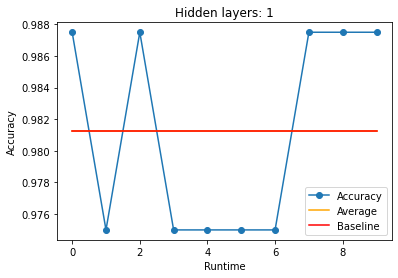

Mean accuracy is: 0.9875


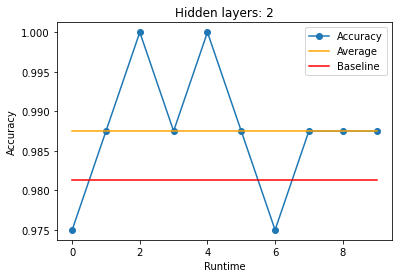

Mean accuracy is: 0.97875


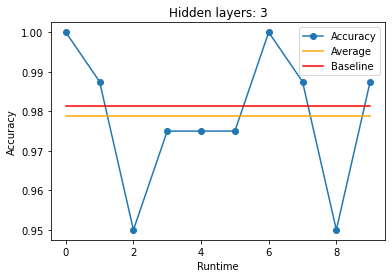

Mean accuracy is: 0.8925


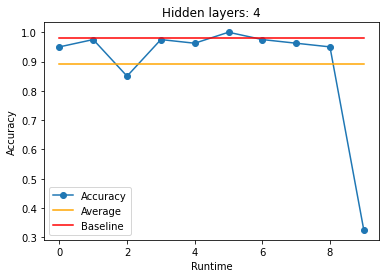

In [4]:
act='logistic'
lr=0.1
hl = [(4),(4,4),(4,4,4),(4,4,4,4)]

for hli in hl:
    scores=[]
    for i in range(10):
        clf = MLPClassifier(random_state=i,hidden_layer_sizes=hli, max_iter=1000,
                            learning_rate_init=lr,activation=act).fit(TrX, Try)
        clf.predict_proba(TeX)
        clf.predict(TeX)
        sc=clf.score(TeX, Tey)
        scores.append(sc)
    smean=st.mean(scores)
    print("Mean accuracy is:",smean)
#     print(clf.n_layers_)
    plt.plot(scores,marker='o',label='Accuracy')
    x=[]
    y=[]
    z=[]
    
    for j in range(10):
        x.append(j)
        y.append(smean)
        z.append(base)
        
    plt.plot(x,y,color='orange',label='Average')
    plt.plot(x,z,color='red',label='Baseline')

    
    plt.xlabel('Runtime')
    plt.ylabel('Accuracy')
    plt.title('Hidden layers: '+str(clf.n_layers_ -2))
    plt.legend()
    plt.show()

having 2,3 or 4 hidden layers gives same average we will continue with 2 hidden layer 

# Training the model generated in the previous step with different values for learning rate

Average accuracy 0.9875


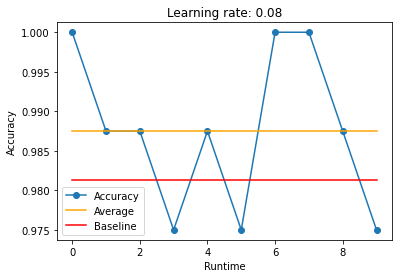

Average accuracy 0.9825


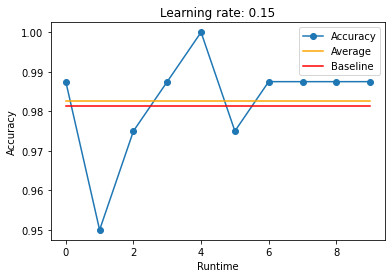

Average accuracy 0.8400000000000001


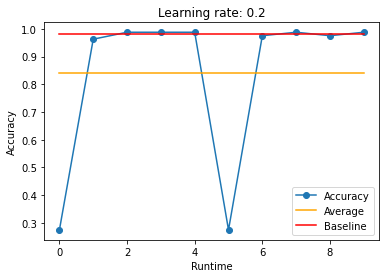

Average accuracy 0.71375


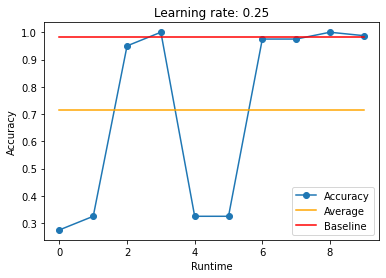

Average accuracy 0.71


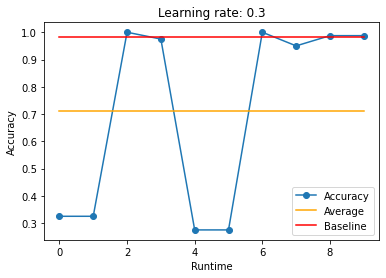

In [5]:
act='logistic'
hl=(4,4)

for lr in [0.08,0.15,0.2,0.25,0.3]:
    scores=[]
    for i in range(10):
        clf = MLPClassifier(random_state=i,hidden_layer_sizes=hl, max_iter=1000,
                            learning_rate_init=lr,activation=act).fit(TrX, Try)
        clf.predict_proba(TeX)
        clf.predict(TeX)
        sc=clf.score(TeX, Tey)
        scores.append(sc)
    smean=st.mean(scores)
    print('Average accuracy',smean)
    plt.plot(scores,marker='o',label='Accuracy')
    x = []
    y=[]
    
    for j in range(10):
        x.append(j)
        y.append(smean)
    plt.plot(x,y,color='orange',label='Average')
    plt.plot(x,z,color='red',label='Baseline')
    plt.xlabel('Runtime')
    plt.ylabel('Accuracy')
    plt.title('Learning rate: '+str(lr))
    plt.legend()
    plt.show()

highest average is for the segmoid function , hidden layers = 2 and learning rate = 0.08 thus we will choose it

# Final best Model


In [6]:
clf = MLPClassifier(random_state=0, max_iter=1000,activation='logistic',
                    hidden_layer_sizes=(4,4),learning_rate_init=0.08).fit(TrX, Try)
clf.predict_proba(TeX)
clf.score(TeX, Tey)
print(clf.score(TeX, Tey))

1.0


# Plotting the learning Curve for the final model

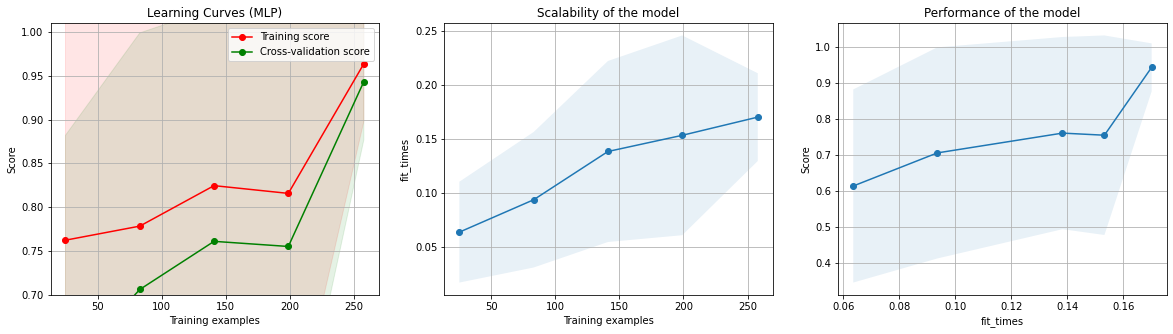

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


# fig, axes = plt.subplots(1, 1, figsize=(10, 15))

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)



title = r"Learning Curves (MLP)"
plot_learning_curve(clf, title, TrX, Try, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

# Training curve V.S. Loss function


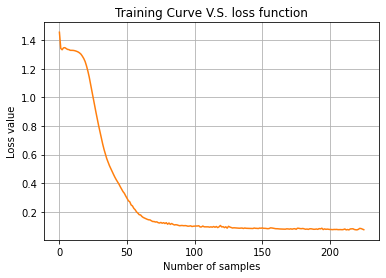

In [29]:
axes = plt.plot(1, 1)
plt.plot(clf.loss_curve_);
plt.grid()
plt.xlabel("Number of samples")
plt.ylabel("Loss value")
plt.title("Training Curve V.S. loss function");

1.0


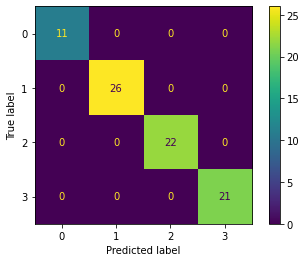

In [9]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
y_test_list = Tey.values.tolist()
print(clf.score(TeX, Tey))
plot_confusion_matrix(clf,TeX,Tey)